In [3]:
import numpy as np
import pandas as pd

In [10]:
data = np.loadtxt("pose_ed.csv",delimiter = ",")
data

array([[1.00000000e+00, 1.79526864e+02, 1.79607427e+02, ...,
        9.87907710e-02, 1.14603838e-01, 1.96946869e-01],
       [2.00000000e+00, 1.79984690e+02, 1.79803625e+02, ...,
        4.78127970e-02, 4.21142730e-02, 8.76665700e-02],
       [3.00000000e+00, 1.79697453e+02, 1.79948002e+02, ...,
        4.21505580e-02, 1.11820050e-02, 3.52756690e-02],
       ...,
       [1.59000000e+02, 1.55447118e+02, 1.73464271e+02, ...,
        2.16916022e-01, 4.60127264e-01, 6.82056795e-01],
       [1.60000000e+02, 1.52604221e+02, 1.71771049e+02, ...,
        2.40841038e-01, 4.73904219e-01, 4.90302267e-01],
       [1.61000000e+02, 1.52036630e+02, 1.71377263e+02, ...,
        8.92595730e-02, 2.35500196e-01, 1.88280585e-01]])

In [42]:
x = data[:,4].reshape(-1,1)
y = data[:,5].reshape(-1,1)

In [43]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y)

In [44]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()

In [45]:
alg1.fit(X_train,Y_train)

LinearRegression()

In [46]:
m = alg1.coef_[0]
m

array([0.60853777])

In [47]:
c = alg1.intercept_
c

array([0.13410573])

In [48]:
Y_pred = alg1.predict(X_test)
Y_pred

array([[0.16450529],
       [0.87192869],
       [0.15687194],
       [1.04637316],
       [0.20841908],
       [0.1381394 ],
       [1.44232481],
       [0.25897856],
       [0.1472336 ],
       [0.15058475],
       [0.14156921],
       [0.16119912],
       [3.29353707],
       [0.15231871],
       [0.18142348],
       [1.00489965],
       [0.72803579],
       [0.26619764],
       [0.21026083],
       [3.43437476],
       [0.13935914],
       [0.18827309],
       [0.14119577],
       [0.20067913],
       [0.16024406],
       [0.17278563],
       [0.19596176],
       [0.19752166],
       [0.16699003],
       [0.23239604],
       [0.15819073],
       [0.28748179],
       [0.25198975],
       [0.24633375],
       [0.17663514],
       [0.21771025],
       [0.48394741],
       [1.56488205],
       [0.14155878],
       [1.05853434],
       [0.2708989 ]])

In [49]:
import matplotlib.pyplot as plt

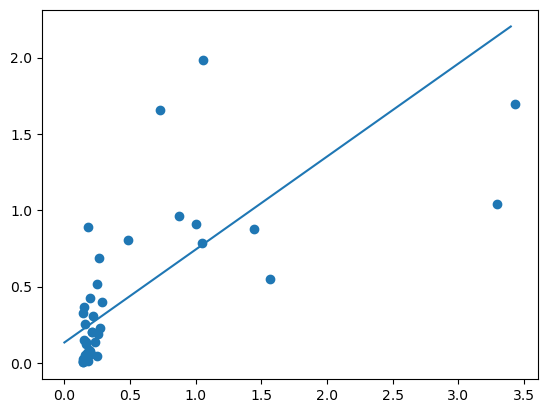

In [51]:
plt.scatter(Y_pred,Y_test)
x_line = np.arange(0,3.5,0.1)
y_line = m*x_line+c
plt.plot(x_line,y_line)

In [52]:
def fit(X_train,Y_train):
    num = (X_train*Y_train).mean()-X_train.mean()*Y_train.mean()
    den = (X_train**2).mean()-X_train.mean()**2
    m = num/den
    c = Y_train.mean() - m*X_train.mean()
    return m,c

In [53]:
def predict(x,m,c) :
    return m*x + c

In [54]:
def score(y_truth,y_pred):
    u = ((y_truth-y_pred)**2).sum()
    v = ((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

In [55]:
def cost(x,y,m,c) :
    return ((y-m*x+c)**2).mean()
C_1 = cost(X_test,Y_test,m,c)
print(C_1)

0.33287654076662837


In [56]:
#test data
y_pred = predict(X_test,m,c)
print(score(Y_test,y_pred))
#train data 
y_train_pred = predict(X_train,m,c)
print(score(Y_train,y_train_pred))
print(m,c)

-0.2631794824525704
0.7285157630558015
[0.60853777] [0.13410573]
